Compiling model...
Building feed-forward neural network...
'build' took 0.049742 s



2024-11-20 18:50:55.552762: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2109 MB memory:  -> device: 0, name: Quadro RTX 8000, pci bus id: 0000:01:00.0, compute capability: 7.5
2024-11-20 18:50:55.553615: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46559 MB memory:  -> device: 1, name: Quadro RTX 8000, pci bus id: 0000:22:00.0, compute capability: 7.5
2024-11-20 18:50:55.554440: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 2697 MB memory:  -> device: 2, name: Quadro RTX 8000, pci bus id: 0000:41:00.0, compute capability: 7.5
2024-11-20 18:50:55.555253: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 46559 MB memory:  -> device: 3, name: Quadro RTX 8000, pci bus id: 0000:61:00.0, comput

'compile' took 0.656916 s

Initializing variables...
Training model...

Step      Train loss    Test loss     Test metric   
0         [4.95e+01]    [4.83e+01]    [1.00e+00]    
1000      [4.81e+01]    [4.85e+01]    [9.90e-01]    
2000      [3.79e+01]    [8.70e+01]    [9.74e-01]    
3000      [3.38e+01]    [9.43e+01]    [1.02e+00]    
4000      [4.85e+01]    [4.82e+01]    [9.89e-01]    
5000      [4.84e+01]    [4.83e+01]    [9.90e-01]    
6000      [4.83e+01]    [4.84e+01]    [9.90e-01]    
7000      [4.83e+01]    [4.84e+01]    [9.90e-01]    
8000      [4.81e+01]    [4.84e+01]    [9.90e-01]    
9000      [4.76e+01]    [4.86e+01]    [9.88e-01]    
10000     [4.82e+01]    [4.82e+01]    [9.91e-01]    

Best model at step 3000:
  train loss: 3.38e+01
  test loss: 9.43e+01
  test metric: [1.02e+00]

'train' took 25.951296 s

Saving loss history to /root/shared/dynimplant/loss.dat ...
Saving training data to /root/shared/dynimplant/train.dat ...
Saving test data to /root/shared/dynimplant/te

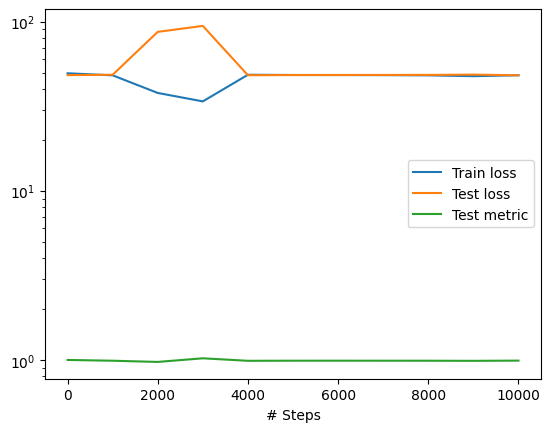

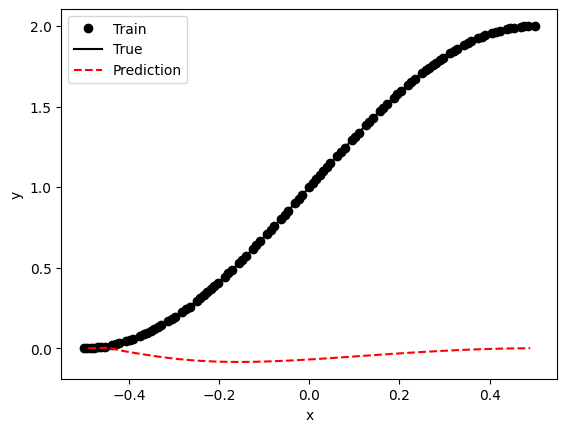

In [5]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, paddle"""
import deepxde as dde
import numpy as np
from deepxde.backend import tf

l = 1

def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    f = (np.pi / l) ** 2 * tf.sin(np.pi / l * x)
    return - dy_xx - f

def func(x):
    return np.sin(np.pi / l * x) + 1


geom = dde.geometry.Interval(-l/2, l/2)
data = dde.data.PDE(geom, pde, [], 100, 2, solution=func, num_test=100)

def output_transform(x, y):
    return ((x - l/2) * (x + l/2)) ** 2 * y


layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

net.apply_output_transform(output_transform)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=10000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)